## Exploratory Data Analysis

In this part of the notebook I am going to explore and visualize the dataset of Cardiovascular Diseases Risk Prediction Dataset

The Dataset contains 19 variables. 12 are numerical and 7 are categorical variables


### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns # plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

### Loading the data

In [3]:
#reading the CSV file in dataframe
df = pd.read_csv('CVD_cleaned.csv')

In [4]:
#showing the first 5 rows
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


### Data Overview

In [5]:
#view the shape of data
print("Number of instances", df.shape[0])
print("Number of features", df.shape[1])

Number of instances 308854
Number of features 19


In [6]:
#view the features
print("Data Features:\n",df.columns.values)

Data Features:
 ['General_Health' 'Checkup' 'Exercise' 'Heart_Disease' 'Skin_Cancer'
 'Other_Cancer' 'Depression' 'Diabetes' 'Arthritis' 'Sex' 'Age_Category'
 'Height_(cm)' 'Weight_(kg)' 'BMI' 'Smoking_History' 'Alcohol_Consumption'
 'Fruit_Consumption' 'Green_Vegetables_Consumption'
 'FriedPotato_Consumption']


In [7]:
#checking the missing values
print(df.isna().sum())
df = df.dropna()
df = df.reset_index(drop=True)

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64


In [8]:
#data types of the columns 
df.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [9]:
# statistical info describes the numerical data 
df.describe()

,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


In [10]:
df.describe(include='object')

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,4,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,259141,207783,160196,33434,183590


In [11]:
df["Diabetes"].unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [12]:
df["Diabetes"]= df["Diabetes"].str.replace(r'^No, pre-diabetes or borderline diabetes.*', 'pre-diabetes', regex= True)
df["Diabetes"]= df["Diabetes"].str.replace(r'^Yes, but female told only during pregnancy.*', 'Yes', regex= True)

### Analysing The Features
*The answer is [Yes or No] for these questions*

**Heart Disease**: Respondents that reported having coronary heart disease or mycardialinfarction.

**Skin Cancer**: Respondents that reported having skin cancer


**Other Cancer**: Respondents that reported having any other types of cancer

**Depression**:Respondents that reported having a depressive disorder (including depression, major depression, dysthymia, or minor depression)

**Diabetes**: Respondents that reported having a diabetes. If yes, what type of diabetes it is/was.

**Arthritis**: Respondents that reported having an Arthritis.

In [13]:
Heart_Disease = df.Heart_Disease.value_counts()
Skin_Cancer = df.Skin_Cancer.value_counts()
Other_Cancer = df.Other_Cancer.value_counts()
Depression = df.Depression.value_counts()
Diabetes = df.Diabetes.value_counts()
Arthritis = df.Arthritis.value_counts()

In the next code snippet we will prensent Pie Charts for each feature.

In [14]:
fig = plt.figure(figsize=(15,10), dpi=1600)
#Heart_Disease
ax1 = plt.subplot2grid((3,2),(0,0))
plt.pie(Heart_Disease, labels=Heart_Disease.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having Coronary Heart Disease')

#Skin_Cancer
ax1 = plt.subplot2grid((3,2),(0,1))
plt.pie(Skin_Cancer, labels=Skin_Cancer.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having Skin Cancer')

#Other_Cancer
ax1 = plt.subplot2grid((3,2),(1,0))
plt.pie(Other_Cancer, labels=Other_Cancer.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having any other types of cancer')

#Depression
ax1 = plt.subplot2grid((3,2),(1,1))
plt.pie(Depression, labels=Depression.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having a Depressive disorder')

#Diabetes
ax1 = plt.subplot2grid((3,2),(2,0))
plt.pie(Diabetes, labels=Diabetes.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having a Diabetes')

#Arthritis
ax1 = plt.subplot2grid((3,2),(2,1))
plt.pie(Arthritis, labels=Arthritis.index, autopct='%.1f%%')
plt.title('The percentage of Respondents Having an Arthritis')

plt.tight_layout(pad=2);

#### General health
This feature represent the answer of: Would you say that in general your health is—?

The choises is one from **[Excellent, Very Good, Good, Fair, Poor]**





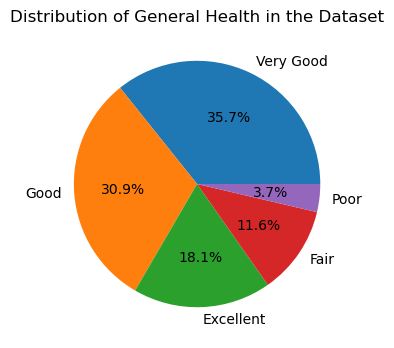

In [15]:
#using pie chart to show distributions

General_Health = df.General_Health.value_counts()
plt.figure(figsize=(8,4))
plt.title("Distribution of General Health in the Dataset")
plt.pie(General_Health, labels=General_Health.index, autopct='%.1f%%');

#### Checkup

This feature reprensnts the question: About how long has it been since you last visited a doctor for a routine checkup?

The answer is one of these **[Within the past year, Within the past 2 years, Within the past 5 years, 5 or more years ago, Never]**

In [16]:
Checkup = df.Checkup.value_counts()
Checkup

Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: Checkup, dtype: int64

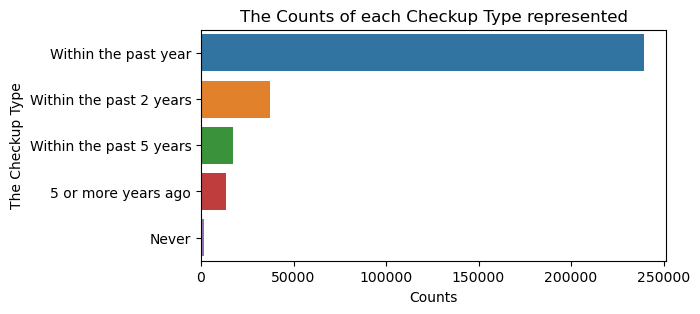

In [17]:
plt.figure(figsize=(6,3))
plt.title("The Counts of each Checkup Type represented")
plt.ylabel('The Checkup Type')
plt.xlabel('Counts')

sns.barplot(y=Checkup.index, x= Checkup.values);

#### Sex
Respondent's Gender

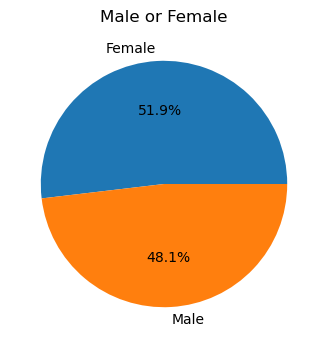

In [18]:
Sex = df.Sex.value_counts()
plt.figure(figsize=(8,4))
plt.title("Male or Female")
plt.pie(Sex, labels=Sex.index, autopct='%.1f%%');

#### Exercise

This feature tells the answer of the question: During the past month, other than your regular job, did you participate in any physical activities or exercises such as running, calisthenics, golf, gardening, or walking for exercise? the answer is simply **Yes or No**

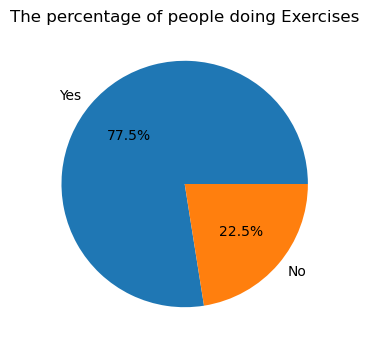

In [19]:
Exercise   = df.Exercise.value_counts()


plt.figure(figsize=(8,4))
plt.title("The percentage of people doing Exercises")
plt.pie(Exercise, labels=Exercise.index, autopct='%.1f%%');

#### Heart Disease

This feature tells: the Respondents that reported having coronary heart disease or mycardialinfarction

**[Yes or No]**

In [20]:
Heart_Disease = df.Heart_Disease.value_counts()
Heart_Disease

No     283883
Yes     24971
Name: Heart_Disease, dtype: int64

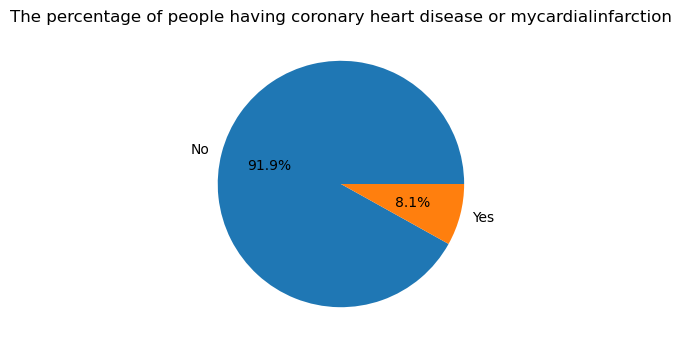

In [21]:
Heart_Disease = df.Heart_Disease.value_counts()
plt.figure(figsize=(8,4))
plt.title("The percentage of people having coronary heart disease or mycardialinfarction")
plt.pie(Heart_Disease, labels=Heart_Disease.index, autopct='%.1f%%');